In [1]:
# 문장토큰화
# 기본로직
    # 마침표, 느낌표, 물음표를 끝 후보로 인식
    # 약어 패턴 학습(Dr, Mr,  U.S.A 등)
    # 대문자로 시작하는지
    # 통계적 모델을 사용해 진짜 문장 경계인지 판단
# 다국어
# 약어와 실제 문장끝을 구분하는 기계학습 모델 내장

# 단어 토큰화 word_tokenization
    # 규칙기반 
    # 공백기준 단어분리
    # 구두점을 별도 토큰으로 분리
    # 축약형 처리 it's, it, s
    # 소유격 처리 "Let's" Let s
    
    # 구두점기반 WordPunctTokenizer
    # 모든 구두점을 분리
    # It's It, ', s

    # 정규표현식 RegexpTokenizer
# 노이즈와 불용어 제거
    # set 자료구조 : 중복제거
# 어간추출과 표제어 추출
    # 어간추출 : 규칙기반, 단어의 접사 제거
    # List Comprehension : 필터링
    # NLTK의 불용어사전

In [2]:
# %conda install nltk

In [ ]:
# NLTK (Natural Language Toolkit) 라이브러리 임포트
# NLTK는 자연어 처리를 위한 파이썬의 대표적인 라이브러리입니다
import nltk

# sent_tokenize: 문장 단위로 텍스트를 분리하는 토큰화 도구
# 마침표, 느낌표, 물음표 등을 기준으로 문장을 구분합니다
from nltk.tokenize import sent_tokenize

In [4]:
# NLTK의 필요한 데이터 패키지들을 다운로드
nltk.download('wordnet')      # 영어 워드넷 (단어의 의미 관계 데이터베이스)
nltk.download('webtext')      # 웹 텍스트 말뭉치
nltk.download('stopwords')    # 불용어 사전 (the, a, an 등 자주 사용되는 일반적인 단어들)
nltk.download('punkt')        # 문장 토큰화 모델
nltk.download('punkt_tab')    # punkt 토큰화 관련 추가 데이터

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
# 영어 문장 토큰화 예제
text = "Hello everyone. It's good to see you. Let's start our text mining class."
# sent_tokenize를 사용하여 문장 단위로 분리
sent_tokenize(text)

['Hello everyone.',
 "It's good to see you.",
 "Let's start our text mining class."]

In [6]:
# 한국어 문장 토큰화 예제
# NLTK의 sent_tokenize는 한국어도 기본적으로 처리 가능
# 하지만 한국어 특성을 완벽히 반영하지는 못함
sentence_kor = "안녕하세요 여러분. 만나서 반갑습니다. 이제 학습을 시작해볼까요?"
sent_tokenize(sentence_kor)

['안녕하세요 여러분.', '만나서 반갑습니다.', '이제 학습을 시작해볼까요?']

In [7]:
# word_tokenize를 사용하여 단어 단위로 토큰화
# 문장을 개별 단어로 분리
from nltk.tokenize import word_tokenize
word_tokenize(sentence_kor)

['안녕하세요', '여러분', '.', '만나서', '반갑습니다', '.', '이제', '학습을', '시작해볼까요', '?']

In [8]:
# WordPunctTokenizer: 구두점을 기준으로 토큰화
# 구두점(마침표, 쉼표 등)도 개별 토큰으로 분리
from nltk.tokenize import WordPunctTokenizer
WordPunctTokenizer().tokenize(text)

['Hello',
 'everyone',
 '.',
 'It',
 "'",
 's',
 'good',
 'to',
 'see',
 'you',
 '.',
 'Let',
 "'",
 's',
 'start',
 'our',
 'text',
 'mining',
 'class',
 '.']

In [9]:
# 정규표현식을 사용한 토큰화
import re
# findall: 패턴과 일치하는 모든 부분을 찾아 리스트로 반환
# [abc]: a, b, c 중 하나와 일치하는 문자를 찾음
re.findall("[abc]","how are you boy")

['a', 'b']

In [51]:
# 노이즈와 불용어 제거
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

english_stops = stopwords.words('english')
test1 = "Sorry, I couldn't go to movie yesterday"
# tokens = word_tokenize(test1)
tokenizer = RegexpTokenizer("[\\w]+")
tokens = tokenizer.tokenize(test1.lower())

[token for token in tokens if token not in english_stops]

['sorry', 'go', 'movie', 'yesterday']

In [50]:
german_stops = stopwords.words('german')

In [11]:
# 다양한 정규표현식 패턴을 사용한 토큰화 예제

# [a-z]{4,}: 소문자로만 이루어진 4글자 이상의 단어 추출
RegexpTokenizer("[a-z]{4,}")

# [\\w']{3,}: 단어 문자와 아포스트로피를 포함하는 3글자 이상의 단어 추출
RegexpTokenizer("[\\w']{3,}")

# [\\w]: 단어 문자만 추출 (아포스트로피 제외)
# 예: can't -> can t로 분리됨
RegexpTokenizer("[\\w]")

RegexpTokenizer(pattern='[\\w]', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [12]:
# 어간 추출(Stemming) 예제
# Porter Stemmer를 사용하여 단어의 어간을 추출
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# 다양한 형태의 단어에서 어간 추출
# cooking -> cook
# cookery -> cookeri
# coobooks -> coobook
stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('coobooks')

('cook', 'cookeri', 'coobook')

In [13]:
# 주요목적
    # 어간추출처럼 대충 줄이지 않고 맥락에 맞는 정확한 단어로 만들어서 NLP 품질 향상
    # 단점 : 사전에 의존해서 언어/맥락 제한

In [14]:
# 표제어 추출(Lemmatization) 예제 - 단어의 기본 사전 형태
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# 기본적으로 명사로 취급하여 표제어 추출
print(lemmatizer.lemmatize('cooking'))  # cook

# pos 매개변수로 품사 지정 (v: 동사)
print(lemmatizer.lemmatize('cooking', pos='v')) # cook

cooking
cook


In [ ]:
# 품사(Part of Speech) 태그 설명
# n: noun(명사)
# v: verb(동사)
# a: adjective(형용사)
# r: adverb(부사)

In [16]:
lemmatizer.lemmatize('better', pos='a')


'good'

In [17]:
# 품사 태깅
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger_eng')
tokens = "hello everyone. It's good to see you. Let's start out text mining class!"
tokens = word_tokenize(tokens)
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('hello', 'NN'),
 ('everyone', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('good', 'JJ'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('you', 'PRP'),
 ('.', '.'),
 ('Let', 'VB'),
 ("'s", 'POS'),
 ('start', 'VB'),
 ('out', 'RP'),
 ('text', 'NN'),
 ('mining', 'NN'),
 ('class', 'NN'),
 ('!', '.')]

In [18]:
# 품사 태그 정보 확인
nltk.download('tagsets_json')
nltk.help.upenn_tagset() # 명사 동사 형용사 NN VB JJ

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets_json to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!


In [19]:
# 특정 품사 추출
tag_lists = ['NN','VB','JJ']
[word for word,tag in nltk.pos_tag(tokens) if tag in tag_lists]

['hello', 'everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'class']

In [20]:
# NLTK는 영어기반 한국어의 조사분리 불가능, 어미변화처리 불가능
#   Konlpy Okt 사용해결

In [21]:
# %pip install JPye1# 
%pip install Konlpy

Note: you may need to restart the kernel to use updated packages.


In [22]:
# KoNLPy의 Okt 형태소 분석기 사용
from konlpy.tag import Okt
t = Okt()

In [23]:
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''
tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비출어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비출어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


In [ ]:

print(f'명사 : {t.nouns(sentence)}')
print(f'품사태깅 : {t.pos(sentence)}')

명사 : ['절망', '반대', '희망', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']
품사태깅 : [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상', 'Noun'), ('을', 'Josa'), ('비출어줄까', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('정희성', 'Noun'), (',', 'Punctuation'), ('희망', 'Noun'), ('공부', 'Noun')]


In [ ]:
# 그래프와 워드클라우드
import nltk
nltk.download('gutenberg') # 고전작품들의 말뭉치
from nltk.corpus import gutenberg # 구텐버그 밑뭉치 중에서 이상한 나라의 엘리스 텍스트 로드
gutenberg.fileids()
doc_alice = gutenberg.open('carroll-alice.txt').read()
print(doc_alice)

In [26]:
# 토큰화 및 전처리
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice)
print(f'{len(tokens_alice)}')

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\\w']{3,}")
reg_alice = tokenizer.tokenize(doc_alice.lower())
print(len(reg_alice))

33535
21616


In [27]:
# 불용어 제거
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))
result_alice = [word for word in reg_alice if word not in english_stops]
len(result_alice)

12871

In [28]:
# 품사 태깅 및 필터링(명사 동사 형용사만)
my_tag_set = ['NN','VB','VBD','JJ']
my_word = [word for word, tag in nltk.pos_tag(reg_alice) if tag in my_tag_set]

In [29]:
from collections import Counter
sorted_word_count = dict(Counter(my_word))
sorted_word_count

{"alice's": 8,
 'carroll': 1,
 'chapter': 11,
 'rabbit': 46,
 'hole': 5,
 'alice': 298,
 'was': 356,
 'get': 39,
 'tired': 5,
 'sister': 8,
 'bank': 3,
 'nothing': 30,
 'had': 176,
 'book': 11,
 'use': 16,
 'thought': 60,
 'conversation': 10,
 'own': 10,
 'mind': 10,
 'well': 6,
 'hot': 7,
 'day': 29,
 'made': 21,
 'feel': 8,
 'sleepy': 5,
 'stupid': 3,
 'pleasure': 2,
 'daisy': 1,
 'chain': 1,
 'worth': 4,
 'trouble': 6,
 'white': 30,
 'pink': 1,
 'ran': 16,
 'remarkable': 2,
 'did': 60,
 'think': 32,
 'way': 56,
 "'oh": 5,
 'dear': 22,
 'occurred': 2,
 'have': 37,
 'time': 71,
 'seemed': 25,
 'quite': 7,
 'natural': 4,
 'took': 24,
 'watch': 8,
 'waistcoat': 2,
 'pocket': 7,
 'looked': 44,
 'hurried': 10,
 'started': 2,
 'flashed': 1,
 'take': 15,
 'curiosity': 5,
 'field': 1,
 'see': 41,
 'large': 33,
 'hedge': 2,
 'moment': 29,
 'went': 83,
 'world': 7,
 'tunnel': 1,
 'dipped': 2,
 'found': 22,
 'deep': 5,
 'fell': 6,
 'plenty': 2,
 'look': 25,
 'wonder': 12,
 'happen': 7,
 'first'

In [30]:
# %conda install wordCloud

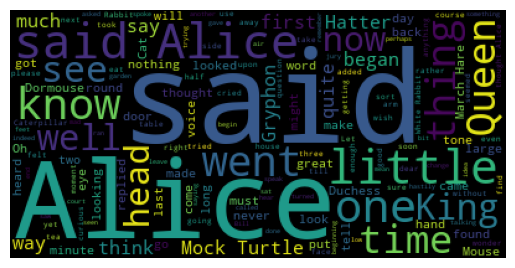

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordCloud = WordCloud().generate(doc_alice)
plt.axis('off') # 축 제거
plt.imshow(wordCloud)

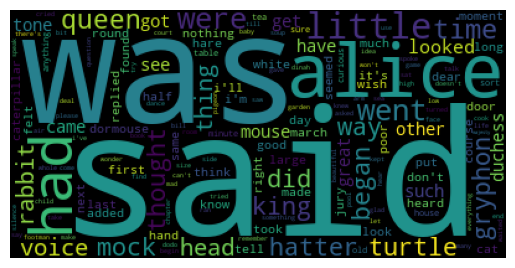

In [32]:
wc = wordCloud.generate_from_frequencies(sorted_word_count)
plt.axis('off')
plt.imshow(wc)
plt.show()

카운트기반 문서표현 방법 Bag of Words, TF-IDF

In [33]:
# 영화 리뷰 데이타셋 로드
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# 데이타셋 구조 확인
from nltk.corpus import movie_reviews

print(f'review count : {len(movie_reviews.fileids())}')
print(f'categories of reviews : {movie_reviews.categories()}')

review count : 2000
categories of reviews : ['neg', 'pos']


In [5]:
# BOW 카운트 백터 생성
# 수동 구현
documents = [movie_reviews.words(field) for field in movie_reviews.fileids()]
documents

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...],
 ['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...],
 ['it', 'is', 'movies', 'like', 'these', 'that', 'make', ...],
 ['"', 'quest', 'for', 'camelot', '"', 'is', 'warner', ...],
 ['synopsis', ':', 'a', 'mentally', 'unstable', 'man', ...],
 ['capsule', ':', 'in', '2176', 'on', 'the', 'planet', ...],
 ['so', 'ask', 'yourself', 'what', '"', '8mm', '"', '(', ...],
 ['that', "'", 's', 'exactly', 'how', 'long', 'the', ...],
 ['call', 'it', 'a', 'road', 'trip', 'for', 'the', ...],
 ['plot', ':', 'a', 'young', 'french', 'boy', 'sees', ...],
 ['best', 'remembered', 'for', 'his', 'understated', ...],
 ['janeane', 'garofalo', 'in', 'a', 'romantic', ...],
 ['and', 'now', 'the', 'high', '-', 'flying', 'hong', ...],
 ['a', 'movie', 'like', 'mortal', 'kombat', ':', ...],
 ['she', 'was', 'the', 'femme', 'in', '"', 'la', ...],
 ['john', 'carpenter', 'makes', 'b', '-', 'movies', '.', ...],
 ['i', "'", 'm', 'really', 'starting', 'to', 'w

In [6]:
# 단어 빈도 계산
word_count = {}
for text in documents:
    for word in text:
        word_count[word] =  word_count.get(word,0) + 1
sorted_features = sorted(word_count, key=word_count.get, reverse=True)

In [ ]:
# 전처리 및 재계산
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer("[\\w']{3,}")
english_stops = set(stopwords.words('english'))
documents = [movie_reviews.raw(field) for field in movie_reviews.fileids()]
tokens = [ [token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents]


In [38]:
word_count = {}
for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word,0) + 1
sorted_features = sorted(word_count, key=word_count.get, reverse=True)
for word in sorted_features[:10]:
    print(f'{word} : {word_count[word]}')

film : 8935
one : 5791
movie : 5538
like : 3690
even : 2564
time : 2409
good : 2407
story : 2136
would : 2084
much : 2049


In [39]:
# countVectorizer 문서를 백터화
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(vocabulary=sorted_features)
cv

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [40]:
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
reviews[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [41]:
# 1단계: 필요한 데이터 다운로드
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

# 2단계: 데이터 탐색
from nltk.corpus import movie_reviews

# 데이터셋 크기 파악
print(f"전체 영화 리뷰 수: {len(movie_reviews.fileids())}")
print(f"카테고리: {movie_reviews.categories()}")  # ['neg', 'pos']
print(f"부정 리뷰: {len(movie_reviews.fileids(categories='neg'))}개")
print(f"긍정 리뷰: {len(movie_reviews.fileids(categories='pos'))}개")

# 3단계: 첫 번째 리뷰 살펴보기
first_review_id = movie_reviews.fileids()[0]
first_review = movie_reviews.raw(first_review_id)
print(f"\n첫 번째 리뷰 ID: {first_review_id}")
print(f"원문 일부:\n{first_review[:200]}")

# 4단계: 토큰화 결과 확인
sentences = movie_reviews.sents(first_review_id)  # 문장 단위 토큰화
words = movie_reviews.words(first_review_id)      # 단어 단위 토큰화

print(f"\n문장 토큰화 (첫 2개):")
for i, sent in enumerate(sentences[:2]):
    print(f"  {i+1}: {sent}")

print(f"\n단어 토큰화 (첫 20개): {words[:20]}")

전체 영화 리뷰 수: 2000
카테고리: ['neg', 'pos']
부정 리뷰: 1000개
긍정 리뷰: 1000개

첫 번째 리뷰 ID: neg/cv000_29416.txt
원문 일부:
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w

문장 토큰화 (첫 2개):
  1: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.']
  2: ['they', 'get', 'into', 'an', 'accident', '.']

단어 토큰화 (첫 20개): ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
# RegexpTokenizer: 정규표현식으로 정확한 토큰화
# stopwords : 문법적 기능을 제거하고 단어에 집중
# 상위 N개 단어 선택 : 메모리 효율성과 노이즈 제거의 균형

In [43]:
# stopwords 라이브러리 사용 예시
from nltk.corpus import stopwords

# 영어 불용어 목록 로드
english_stops = set(stopwords.words('english'))

# 불용어 예시 출력
print("불용어 목록 일부:")
print(list(english_stops)[:10])

# 텍스트 예시
text = "The quick brown fox jumps over the lazy dog"
words = text.lower().split()

# 불용어 제거
filtered_words = [word for word in words if word not in english_stops]

print("\n원본 텍스트:", text)
print("불용어 제거 후:", " ".join(filtered_words))

불용어 목록 일부:
['nor', 'hadn', 'just', 'only', "we're", 'when', 'does', 'not', 'on', 'all']

원본 텍스트: The quick brown fox jumps over the lazy dog
불용어 제거 후: quick brown fox jumps lazy dog


In [44]:
# BOW - 수동으로 백터 생성
# 1단계: 모든 문서를 단어 리스트로 변환
documents = [list(movie_reviews.words(fileid)) 
             for fileid in movie_reviews.fileids()]

print(f"전체 문서 수: {len(documents)}")
print(f"첫 문서의 단어 수: {len(documents[0])}")
print(f"첫 문서의 첫 50개 단어:\n{documents[0][:50]}")

# 2단계: 전체 단어 빈도 계산 (불용어 제외 전)
word_count = {}
for doc in documents:
    for word in doc:
        word_count[word] = word_count.get(word, 0) + 1

# 상위 10개 빈도 단어 확인
sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print("\n상위 10개 빈도 단어:")
for i, (word, count) in enumerate(sorted_words[:10], 1):
    print(f"  {i}. '{word}': {count}회")

# 3단계: 불용어 제거 후 처리
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# 정규표현식으로 3글자 이상의 단어만 추출
tokenizer = RegexpTokenizer(r"[\w']{3,}")
# 영어 불용어 로드
english_stops = set(stopwords.words('english'))

# 모든 리뷰를 토큰화하고 불용어 제거
processed_documents = []
for fileid in movie_reviews.fileids():
    raw_text = movie_reviews.raw(fileid)
    tokens = [token for token in tokenizer.tokenize(raw_text) 
              if token not in english_stops]
    processed_documents.append(tokens)

# 처리 후 단어 빈도 재계산
word_count_processed = {}
for doc in processed_documents:
    for word in doc:
        word_count_processed[word] = word_count_processed.get(word, 0) + 1

sorted_processed = sorted(word_count_processed.items(), 
                         key=lambda x: x[1], reverse=True)

print(f"\n전체 서로 다른 단어 수: {len(sorted_processed)}")
print("\n처리 후 상위 10개 단어:")
for i, (word, count) in enumerate(sorted_processed[:10], 1):
    print(f"  {i}. '{word}': {count}회")

# 4단계: 특성 선택 (상위 1000개 단어)
word_features = [word for word, count in sorted_processed[:1000]]
print(f"\n특성으로 선택된 단어 수: {len(word_features)}")
print(f"특성 예시: {word_features[:20]}")

전체 문서 수: 2000
첫 문서의 단어 수: 879
첫 문서의 첫 50개 단어:
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']

상위 10개 빈도 단어:
  1. ',': 77717회
  2. 'the': 76529회
  3. '.': 65876회
  4. 'a': 38106회
  5. 'and': 35576회
  6. 'of': 34123회
  7. 'to': 31937회
  8. ''': 30585회
  9. 'is': 25195회
  10. 'in': 21822회

상위 10개 빈도 단어:
  1. ',': 77717회
  2. 'the': 76529회
  3. '.': 65876회
  4. 'a': 38106회
  5. 'and': 35576회
  6. 'of': 34123회
  7. 'to': 31937회
  8. ''': 30585회
  9. 'is': 25195회
  10. 'in': 21822회

전체 서로 다른 단어 수: 43011

처리 후 상위 10개 단어:
  1. 'film': 8935회
  2. 'one': 5791회
  3. 'movie': 5538회
  4. 'like': 3690회
  5. 'even': 2564회
  6. 'time': 2409회
  7. 'good': 2407회
  8. 'story': 2136회
 

In [45]:
# 각 문서의 고정된 길이의 백터로 변환(모든 문서가 같은 차원)
# 기계학습 알고리즘의 입력 형식으로 변환

def document_features(document, word_features):
    """
    문서를 특성 벡터로 변환
    
    Args:
        document: 토큰화된 단어 리스트
        word_features: 특성으로 사용할 단어 리스트
    
    Returns:
        document의 각 특성에 대한 빈도 리스트
    """
    # 문서 내 단어 빈도 계산
    word_count = {}
    for word in document:
        word_count[word] = word_count.get(word, 0) + 1
    
    # 특성 벡터 생성
    features = []
    for word in word_features:
        # 특성 단어가 문서에 없으면 0
        features.append(word_count.get(word, 0))
    
    return features

# 테스트 실행
test_features = ['one', 'two', 'teen', 'couples', 'solo']
test_doc = ['two', 'two', 'couples']
result = document_features(test_doc, test_features)

print("테스트 단어 리스트:", test_features)
print("테스트 문서:", test_doc)
print("결과 벡터:", result)
print("→ 'two'가 2번, 'couples'가 1번, 나머지는 0")

# 모든 문서에 대해 특성 벡터 생성
feature_sets = [document_features(doc, word_features) 
                 for doc in processed_documents]

print(f"\n생성된 특성 벡터 수: {len(feature_sets)}")
print(f"각 벡터의 차원: {len(feature_sets[0])}")
print(f"\n첫 문서 벡터 (처음 20개):")
for i, (word, count) in enumerate(zip(word_features[:20], feature_sets[0][:20])):
    print(f"  '{word}': {count}")

테스트 단어 리스트: ['one', 'two', 'teen', 'couples', 'solo']
테스트 문서: ['two', 'two', 'couples']
결과 벡터: [0, 2, 0, 1, 0]
→ 'two'가 2번, 'couples'가 1번, 나머지는 0

생성된 특성 벡터 수: 2000
각 벡터의 차원: 1000

첫 문서 벡터 (처음 20개):
  'film': 5
  'one': 3
  'movie': 6
  'like': 3
  'even': 3
  'time': 0
  'good': 2
  'story': 0
  'would': 1
  'much': 0
  'also': 1
  'get': 3
  'character': 1
  'two': 2
  'well': 1
  'first': 0
  'characters': 1
  'see': 2
  'way': 3
  'make': 5

생성된 특성 벡터 수: 2000
각 벡터의 차원: 1000

첫 문서 벡터 (처음 20개):
  'film': 5
  'one': 3
  'movie': 6
  'like': 3
  'even': 3
  'time': 0
  'good': 2
  'story': 0
  'would': 1
  'much': 0
  'also': 1
  'get': 3
  'character': 1
  'two': 2
  'well': 1
  'first': 0
  'characters': 1
  'see': 2
  'way': 3
  'make': 5


In [46]:
# processed_documents[0] # 문장을 토큰화(3개의 연속된 문장, 불용어제거)
for doc in processed_documents[:10]:
    print(len(doc),end=" ")

323 130 262 278 391 361 301 330 416 392 

In [47]:
# 데이타 준비
reviews = [ movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(vocabulary=word_features)
reviews_cv = cv.fit_transform()

TypeError: CountVectorizer.fit_transform() missing 1 required positional argument: 'raw_documents'